# Processando a Informação: Cap. 8: Ponteiros, Listas, Filas e Pilhas






<img src="https://editora.ufabc.edu.br/images/Capa_Processando_Informacao.jpg" alt="Capa" width="150" align="right">

![]("figs/Capa_Processando_Informacao.jpg")

Este caderno (Notebook em CONSTRUÇÃO) é parte complementar *online* do livro **[Processando a Informação](https://editora.ufabc.edu.br/matematica-e-ciencias-da-computacao/58-processando-a-informacao): um livro prático de programação independente de linguagem**, que deve ser consultado no caso de dúvidas sobre os temas apresentados. 

> Este conteúdo pode ser copiado e alterado livremente e foi inspirado nesse livro. 

> O conteúdo deste capítulo foi inspirado em:
* Notas do prof. Paulo Feofiloff: [[1](https://www.ime.usp.br/~pf/algoritmos/aulas/pont.html)]; [[2](https://www.ime.usp.br/~pf/algoritmos/aulas/aloca.html)]; [[3](https://www.ime.usp.br/~pf/algoritmos/aulas/lista.html)]; [[4](https://www.ime.usp.br/~pf/algoritmos/aulas/fila.html)].
* Notas de aula de professores da UFABC, em especial, dos professores Luiz Rozante e Wagner Botelho.
* Para mais detalhes de tipos de alocação de memória, ver [[ref](https://www.inf.ufpr.br/roberto/ci067/10_aloc.html)].



## Sumário
* Revisão do capítulo anterior
* Introdução
* Alocação estática
* Alocação dinâmica
* Alocação dinâmica para *array* multidimensional
* Tipo Abstrato de Dados (TAD) Lista
* Tipo Abstrato de Dados (TAD) Fila
* Tipo Abstrato de Dados (TAD) Pilha
* Revisão deste capítulo
* Exercícios

## Revisão do capítulo anterior (Struct)

* Introdução
* Paradigma Estruturado
* Paradigma Orientado a Objetos
* Tipos de dados
* Arquivos
* Revisão deste capítulo
* Exercícios

## Introdução

* *Ponteiros* são variáveis especiais que recebem valores referentes à *endereços* da memória principal do computador (RAM - *Random Access Memory*). 

* Ao ligar um computador, o sistema operacional é carregado da memória secundária para a RAM. 

* Quando criamos um programa em alguma linguagem de programação e executamos, esse programa também é carregado na RAM.

* Uma variável `x=10` criada nesse programa também será enderaçada na RAM, por exemplo, no endereço `FF10AF` (em hexadecimal).

* Algumas linguagens de programação aceitam também essas variáveis especiais do tipo *ponteiros*. Por exemplo, em C podemos criar `int *p=FF10AF`.

* Em geral, não precisamos saber qual é o endereço de memória de uma variável, mas é importante saber associar a um ponteiro. Por exemplo, a seguir é criada uma variável inteira `x=10` e em seguida um ponteiro `p` é associado a `x`, incluindo um prefixo `&`, para pegar o endereço de memória de `x` e associar a `p`, com `p = &x`. Para alterar o conteúdo de `p` (o mesmo de `x`), bastar incluir o prefixo `*`, ou seja, `*p = 15`. Ver também a figura a seguir para melhor visualizar operações com ponteiros. 

```
  int x = 10;
  int *p;     // cria um ponteiro para um inteiro
  p = &x;     // faz p apontar para o endereço de x
  *p = 15;    // altera o conteúdo de p (e também de x)
  printf("x=%d *p=%d", x, *p);
```

## Alocação estática

* A *alocação estática* ocorre em *tempo de compilação* a depender a linguagem de programação escolhida. Por exemplo, no exemplo a seguir, o vetor `v` é criado contendo 3 elementos inteiros. Não é possível incluir um quarto elemento nesse vetor quando executamos o progroma (ou seja, em *tempo de execução*). 
* Ao criar vetores ou matrizes, estamos criando ponteiros para o primeiro elemento dessas estruturas. Por exemplo,

```
  int v[3] = { 5,6,7 };
  int* p1;
  p1 = v; // observe que aqui não precisa usar &v
  for (int i = 0; i < 3; i++)
    printf("%d %d %d\n", *(p1 + i), p1[i], v[i]); // *(p1+i) = p1[i] = v[i]
```

* Assim, nesse exemplo é possível fazer operações de ponteiros (`p1 + i`) para acessar os endereços `p1, p1+1, p1+2,` $\cdots $

* Para a variável ponteiro do tipo *char*, `char *p` ocupa um *byte*. Para *int* são 4 *bytes* e para *double* são 8 *bytes*, a depender da arquitetura do computador. 

* Para saber a quantidade de *bytes* de uma variável/tipo, usar a função `sizeof`. 

* Por exemplo, para uma variável do tipo `double`, basta fazer `sizeof (double)`, ou `sizeof(p1)`, onde `p1` foi definido no exemplo anterior.

* Também é possível calcular o tamanho de um vetor alocado estaticamente. Para o exemplo anterior, basta fazer: `sizeof(v) / sizeof(int)`. 

* Esse cálculo é útil para saber o tamanho de um *array* porém tem algumas restriçoes, ver próxima seção.

![]("figs/cap8_1.png")

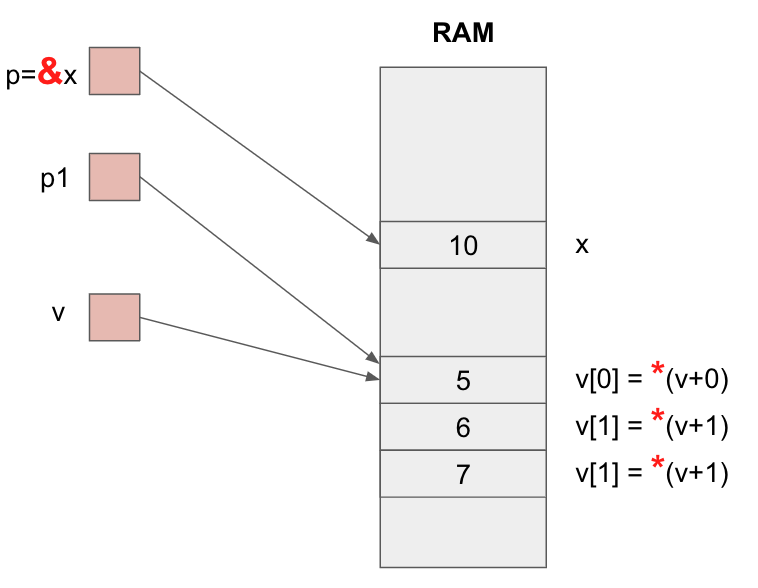

* Também é possível fazer operações de ponteiros para *array* de  `struct`. Ver um exemplo a seguir:


### Exemplo 01 - Criar um registro de Aluno, com `scanf`

Exemplo para criar um *array* de `struct` **Aluno** contendo 4 atributos lidos do teclado com `scanf`. Associar um ponteiro para essa `struct`.

![]("figs/cap8_2.png")

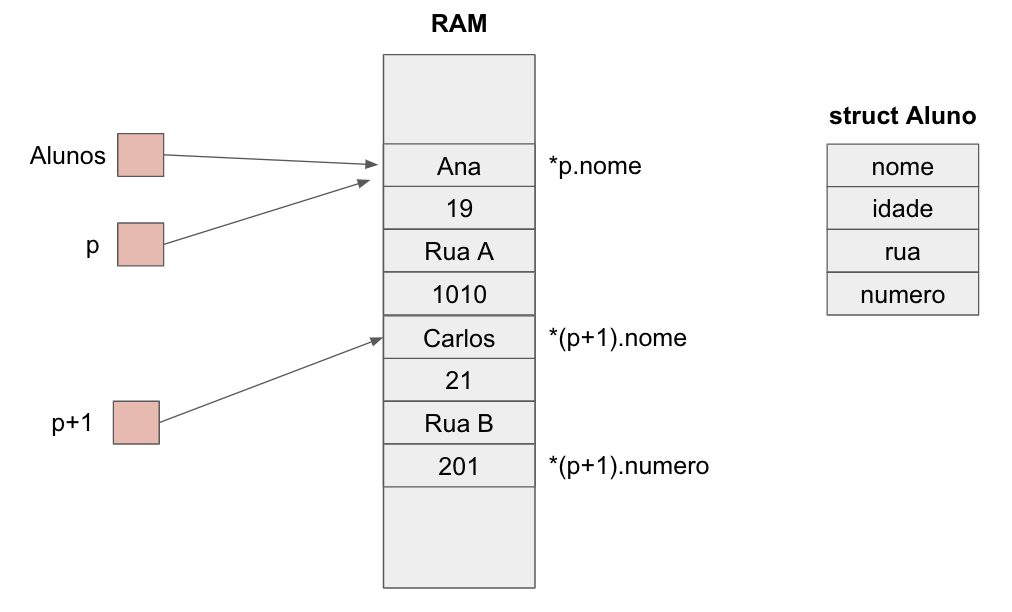

In [ ]:
%%writefile cap8ex01.c
#include <stdio.h>
#include <string.h>

typedef struct {
  char nome[50];
  int idade;
  char rua[50];
  int numero;
} Aluno;

int main() {
  Aluno Alunos[2]; // instancia uma vetor do tipo Aluno
  Aluno *p; // cria um ponteiro para Aluno
  p = Alunos; // ATENÇÃO: associa p a array de alunos
  // ENTRADA DE DADOS
  for (int i = 0; i < 2; i++) {
    printf("Entre com os dados: nome, idade, rua, número:\n");
    fflush(stdin);
    fgets(p[i].nome, 50, stdin);
    scanf("%d", &p[i].idade);
    fflush(stdin);
    fgets(p[i].rua, 50, stdin);
    scanf("%d", &p[i].numero);
  }
  // SAÍDA DE DADOS
  for (int i = 0; i < 2; i++) {
    printf("nome: %s\nidade: %d\n", p[i].nome, p[i].idade);
    printf("rua: %s\nnúmero: %d\n", p[i].rua, p[i].numero);
  }
  return 0;
}

In [ ]:
%%shell
gcc -Wall -std=c99 cap8ex01.c -o output
./output

## Alocação dinâmica

* A alocação dinâmica ocorre quando não sabemos o tamanho de um *array* em tempo de compilação, sendo necessário alocar em tempo de execução. 

* Até agora utilizamos alocação estática para definir o tamanho de um *array*. Por exemplo, para criar um *array* de alunos da UFABC, podemos criar um *array* "muito grande", por exemplo, contendo 100000 alunos.

* Nesse caso, temos dois problemas, se um dia tivermos mais que 100000 alunos, esse *array* não vai suportar. 

* O outro problema é que em geral estamos desperdiçando memória RAM com as posição do *array* não utilizadas.

* Para resolver isso, utilizamos *alocação dinâmica*, inserindo ou retirando elementos do *array* conforme a demanda. 

* Na linguagem C existem os seguintes comandos da biblioteca `stdlib.h`:

  * `malloc` 
    * sintaxe para *array* de inteiros: `int * p = (int *) malloc( TAMANHO * sizeof(int) )`
    * comando utilizado para alocar um *array* de `TAMANHO` de inteiros. 
    * O ponteiro `p` aponta para o primeiro elemento do *array*. 
    * É possível definir um *array* para qualquer tipo de dado, não apenas para `int`, inclusive para `struct`.
    * Se `p = NULL` então não existe memória suficiente para a alocação.
  * `calloc` 
    * sintaxe para *array* de inteiros: `int * p = (int *) calloc( TAMANHO,  sizeof(int) )`
    * análogo ao `malloc`, porém:
      * o `calloc` possui dois argumentos;
      * inicializa todos os elementos com zeros;
      * logo, um pouco mais lento.
  * `realloc` 
    * sintaxe para *array* de inteiros: `p = (int *) realloc( p, TAMANHO *  sizeof(int) )`
    * realoca um *array* 
  * `free` 
    * <font color="red">sempre que alocamos memória dinâmicamente devemos liberar a memória no final, com o camando `free(p)`</font>.
    * se isso não for feito, a memória será liberada somente quando o computador for desligado ou a aplicação encerrada (se o sistema operacional não tiver algum recurso de "coleta de lixo").


### Exemplo de alocação estática

```
void main(){
    int TAMANHO = 0;
    scanf("%i", &TAMANHO);
    int v[TAMANHO]; // NÃO PODE ALTER O TAMANHO DE v APÓS CRIADO!!!
    // free(v); // LOGO, NÃO PODE USAR free!!!
}
```


#### Tamanho de um *array*

```
int main() {
  int v[5] = { 3,4,5,6,7 };

  printf("sizeof(v)=%ld\n", sizeof(v));
  printf("sizeof(int)=%ld\n", sizeof(int));
  printf("tamanho=%li\n", (int) sizeof(p) / sizeof(int));
  return 0;
}
```

Retorna tamanho CORRETO:

```
sizeof(v)=20
sizeof(int)=4
tamanho=5
```

Porém, aqui não retorna o esperado

```
void funcao(int* v) {
  printf("sizeof(v)=%ld\n", sizeof(v));
  printf("sizeof(int)=%ld\n", sizeof(int));
  printf("tamanho=%li\n", (int)sizeof(v) / sizeof(int));
}
int main() {
  int v[5] = { 3,4,5,6,7 };
  funcao(v);
  return 0;
}
```

Retorna tamanho INCORRETO:

```
sizeof(v)=8
sizeof(int)=4
tamanho=2
```

### Exemplo de alocação dinâmica

```
void main(){
    int TAMANHO = 0;
    scanf("%i", &TAMANHO);
    int *v = (int *) malloc( TAMANHO * sizeof(int) );
    free(v); // LIBERAR A MEMÓRIA - S E M P R E !!!!
}
```

#### Não é possível retornar o tamanho de um *array* alocado dinamicamente

```
int main() {
  int* p = (int*)malloc(5 * sizeof(int));

  printf("sizeof(p)=%li\n", sizeof(p));
  printf("sizeof(int)=%li\n", sizeof(int));
  printf("tamanho=%li\n", (int) sizeof(p) / sizeof(int));
  return 0;
}
```

Retorna tamanho INCORRETO:

```
sizeof(p)=8
sizeof(int)=4
tamanho=2
```


## Alocação dinâmica para *array*  multidimensional

* É possível usar um *array* unidimensional para tratar matriz multidimensional. Por exemplo, para uma matriz de L linha e C colunas de inteiros, temos:

```
int * m = (int *) malloc( L*C*sizeof(int) );
for (int i=0; i < L; i++) 
  for (int j=0; j < C; j++) 
    scanf("%d", m + i*C +j); // m+i*C+j = &m[i*C+j]

// ou simplesmente
for (int i=0; i < L*C; i++) 
    scanf("%d", m + i); // linha=i/C e coluna=i%C
``` 

* Para utilizarmos matrizes com alocação dinâmica é interessante trabalharmos com *ponteiro para ponteiro*:
  * primeiro alocamos memória para as linhas (L) da matriz:
    * `int **m = (int**) malloc( L * sizeof(int *) );`
  * em seguida alocamos memória para cada linha da matriz (colunas C):
```
 for (int i=0; i < L; i++) 
    m[i] = (int*) malloc( C * sizeof(int *) ); // m[i] = *(m+i)
```
  * para popular a matriz - opção 1:
```
  for (int i=0; i < L; i++) 
    for (int j=0; j < C; j++) 
      scanf("%d", &m[i][j]); // &m[i][j] = m + i*C + j
```
  * para popular a matriz - opção 2:
```
  for (int i=0; i < L*C; i++) 
      scanf("%d", m+i); // m+i = &m[i/C][i%C]
```
  * <font color="red">não esquecer de LIBERAR A MEMÓRIA</font>:
    * primeiro o conteúdo de cada linha:
```
for (int i=0; i < L; i++) 
  free(m[i]); // m[i] = *(m+i)
```
    * depois toda a matriz:
```
free(m);
```


* Quais as vantagens de usar matriz como **ponteiro de ponteiro**?

## Exemplo 01 - Ler/Escrever matriz com métodos (cap.6 - Matriz)


* Analogamente ao que foi feito no capítulo sobre vetores, onde alocamos os vetores em tempo de execução através de métodos, é possível usar modularização para melhorar a organização, manutenção e reaproveitamento de código.  

* Aqui é apresentado um método `leiaMatriz` e `escrevaMatriz` genéricos

* Para entrada de dados, ou seja, inserir valores nos elementos alocados na memória para uma matriz.

* Além de saída de dados, para escrever a matriz, linha por linha.

#### Pseudocódigo

**Exemplo 01:** Considere um algoritmo para: 
* Ler um inteiro `L` (linhas) representando o número de alunos, 
* Ler um inteiro `C` representando o número de avaliações. 
* Considere a primeira coluna o `RA` do aluno, assim `C=C+1`. 
* Criar uma matriz `m` com dimensões `LxC`. 
* Ler todos os elementos da matriz.
* Escrever todos os elementos da matriz, formando a saída, linha por linha, por exemplo, para uma matriz com `2` alunos e `3` avaliações, escreva:

```
LISTA DE ALUNOS vs Avaliações:
1234 4 3 9
3456 6 4 8
```

```
Função inteiro m[][] leiaMatriz(inteiro L, inteiro C):
    Instanciar e alocar uma matriz m de Reais com L x C
    Para cada i, de i=0; até i<L; passo i=i+1 faça
        Para cada j, de j=0; até j<C; passo j=j+1 faça
            m[i,j] = leia("Digite um número inteiro:");

Função escrevaMatriz(inteiro m[][], inteiro L, inteiro C): 
    Instanciar e alocar uma matriz m de Reais com L x C
    Para cada i, de i=0; até i<L; passo i=i+1 faça
        Para cada j, de j=0; até j<C; passo j=j+1 faça
            escreva(" ", m[i,j]);
        escreva("\n"); // pula linha

// PROGRAMA PRINCIPAL
// ENTRADAS
inteiro L = leia("Digite o numero de alunos:")
inteiro C = leia("Digite o numero de avaliações:")
C = C + 1  // a primeira coluna é o RA
Instanciar uma matriz m com L linhas e C colunas 

m = leiaMatriz(L,C)
// PROCESSAMENTO: ?

// SAÍDA
escrevaMatriz(m)
```

#### Casos para Teste Moodle+VPL

Para o professor criar uma atividade VPL no Moodle para este Exemplo 01, basta incluir em `Casos para teste`, o seguinte texto (pode incluir mais casos):

```
case=caso1
input=2
3
1234 
4 
3 
9
3456
6
4
8
output=
LISTA DE ALUNOS vs Avaliações:
1234 4 3 9
3456 6 4 8
```

In [ ]:
%%writefile cap8ex02.c
#include <stdio.h>
#include<malloc.h>  

int ** leiaMatriz(int L, int C) {
  int **m = (int **)malloc(L*sizeof(int*)); 
  for (int i = 0; i < L; i++) {
    m[i] = (int *)malloc(C * sizeof(int)); // for each row allocate C ints
    for (int j = 0; j < C; j++) 
      scanf("%d", &m[i][j]); 
  }
  return m;
}
void free_matrix(int **m, int L) {
    for (int i = 0; i < L; i++) 
         free(m[i]);
    free(m);
 }
void escrevaMatriz(int **m, int L, int C) {
  for (int i = 0; i < L; i++) {
   for (int j = 0; j < C; j++) 
      printf("%d\t", m[i][j]); 
   printf("\n");
  }
}
int main(void) {
  // ENTRADA DE DADOS
  int L, C, **m;   // variaveis de referência m
  printf("Digite o número de alunos: ");
  scanf("%d", &L);

  printf("Digite o número de avaliações: ");
  scanf("%d", &C);

  C = C + 1; // a primeira coluna é o RA do aluno

  printf("Digite os elementos da matriz");
  m = leiaMatriz(L,C);

  // PROCESSAMENTO ?

  // SAÍDA DE DADOS
  printf("\nLISTA DE ALUNOS vs Avaliações:\n");
  printf("RA ");
  for (int i = 0; i < C-1; i++) 
    printf("\t%d",(i+1)); 
  
  printf("\n");
  escrevaMatriz(m,L,C);
  free_matrix(m,L); // liberar memória alocado com malloc
  return 0;
}

In [ ]:
%%shell
gcc -Wall -std=c99 cap8ex02.c -o output
./output

##### Acessando elemento com `*`

Outras forma de acessar elementos em matriz.

```
  for (int i = 0; i < L; i++) 
   for (int j = 0; j < C; j++) {
      printf("%d\t", m[i][j]); // ou
      printf("%d\t", *(m + i*C + j));
   }
```

Ou utilizando apenas um laço para varrar uma matriz:

```
  for (int i = 0; i < L*C; i++) {
      printf("%d\t", m[i/C][i%C]); // ou
      printf("%d\t", *(m + i));
   }
```

##### Matriz Multimensional

```
for (int k = 0; k < D; k++) // profundidade
  for (int i = 0; i < L; i++) // linha
   for (int j = 0; j < C; j++) { // coluna
      printf("%d\t", m[k][i][j]); // ou
      printf("%d\t", *(m + k*L*C + i*C + j));
   }
```

Ou utilizando apenas um laço para varrar uma matriz:

```
  for (int i = 0; i < D*L*C; i++) {
      d = i/(L*C);
      printf("%d\t", m[d][(d-i)/C][(d-i)%C]); // ou
      printf("%d\t", *(m + i));
   }
```

## Tipo Abstrato de Dado (TAD) Lista

Quando criamos uma estrutura de dados e um conjunto de métodos para manipular essa estrutura, podemos dizer que estamos criando um **Tipo Abstrato de Dados (TAD)** (ou também chamado **Tipo de Dado Abstrato**). Esse conceito é também utilizado em Programação Orientada a Objetos, encapsutando também os métodos na estrutura. A seguir apresentamos dois TADs: **TAD Lista Estática** e **TAD Lista Encadeada**.

### TAD Lista Estática

Ao manipular listas estáticas, em algumas situações (por exemplo, não altera muito o tamanho máximo `MAX_LISTA`), é interessante se definir uma estrutura de dados como segue:

```
#define MAX_LISTA 6
typedef struct {
  int tamanho;
  int conteudos[MAX_LISTA];
} Lista0; // AQUI Lista estática é Lista0 e lista0
```

Além dessa estrutura, muitos métodos podem ser úteis para a sua manipulação. Por exemplo:

```
Lista0* lista0_cria(void);
void lista0_free(Lista0* lista);
int lista0_tamanho(Lista0* lista);
int lista0_cheia(Lista0* lista);
int lista0_insere(Lista0* lista, int conteudo); // insere no final
void lista0_imprime(Lista0* lista);
int lista0_insere_inicio(Lista0* lista, int conteudo);
int lista0_busca(Lista0* lista, int conteudo); // indice 1a ocorrencia
int lista0_remove(Lista0* lista); // remove no final
int lista0_remove_inicio(Lista0* lista);
int lista0_troca(Lista0* lista, int i, int j);
int lista0_remove_conteudo(Lista0* lista, int conteudo); // remove 1o conteudo
```

Esses métodos estão implementados e disponíveis no arquivo `myLista.c`, no GitHub, juntamente com o seu uso no programa `cap8.part1ex03.c`: https://github.com/fzampirolli/codigosPE/tree/master/cap8 

Como esses métodos são aplicações dos conceitos já abordados anteriormente (capítulos 5-vetor, 6-matriz e 7-struct), vamos focar o restante deste capítulo em **Listas Encadeadas**.

### TAD Lista Encadeada (ou dinâmica)

Uma vantagem de trabalhar com **Lista Encadada**, em comparação com as listas estáticas, é que os elementos da lista são inseridos/removidos em tempo de execução. 

Com isso, a princípio não precisamos definir um tamanho da lista (número de elementos), muito menos o tamanho máximo, necessários em listas estáticas. 

Cada elemento de uma lista pode ser definido contendo um conteúdo (por exemplo, do tipo inteiro) e um ponteiro para o próximo elemento da lista, como segue:

```
typedef struct TCelula Celula;
struct TCelula {
  int conteudo;
  Celula* prox;
};
```

Uma célula `c` pode ser declarada e manipulada assim:
```
Celula c;
c.conteudo = 10;
c.prox = NULL;
```

Um ponteiro `p` para uma célula pode ser definido e manipulado assim:

```
Celula *p  = (Celula*)malloc(sizeof(Celula));
*p->conteudo = 10;
*p->pro = NULL;
```

Uma lista encadeada é um conjunto de células interlicadas e pode ser acessada pelo endereço da primeira célula da lista.

Existem várias formas de criar uma lista e de implementar métodos para manipular listas encadeadas. 

Por exemplo, utilizando ponteiro para ponteiro, lista com "cabeça" e simplemente, criando um ponteiro para o início da lista, ver figura a seguir.



#### Ponteiro para ponteiro

```
typedef Celula *Lista; // lista é ponteiro para ponteiro
Lista **lista = (Lista *) malloc(sizeof(Lista));
*lista = NULL; // lista vazia
```

Incluir um primeiro elemento da lista:

```
Celula* no = (Celula*)malloc(sizeof(Celula));
no->conteudo = conteudo;
no->prox = *lista;
*lista = no; 
```



#### Cabeça

```
Celula* cabeca = (Celula*)malloc(sizeof(Celula));
cabeca->prox = NULL; // lista vazia
```

Incluir um primeiro elemento da lista:

```
Celula* no = (Celula*)malloc(sizeof(Celula));
no->conteudo = conteudo;
no->prox = NULL;
cabeca->prox = no; 
```



#### Ponteiro

```
Celula* p = NULL ; // lista vazia
```

Incluir um primeiro elemento da lista:

```
Celula* no = (Celula*)malloc(sizeof(Celula));
no->conteudo = conteudo;
no->prox = NULL;
p = no; 
```

Para simplificar alguns métodos, vamos apresentar a seguir algumas implementações para manipular lista com cabeça (o primeiro elemento, a cabeça, tem o campo `prox` apontando para o primeiro elemento da lista):

![]("figs/cap8_3.png")

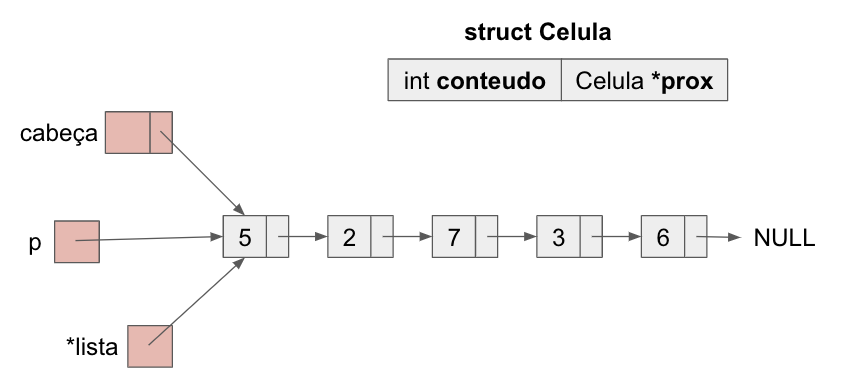

### Exemplo 03 - Criar e manipular lista encadeada

In [ ]:
%%writefile myLista.h
#include <stdio.h>
#include <stdlib.h>

typedef struct TCelula Celula;
struct TCelula {
  int conteudo;
  Celula* prox;
};
Celula* lista_cria(void);
void lista_insere(Celula* p, int conteudo);
void lista_imprime(Celula* cabeca);
void lista_free(Celula* cabeca);
void lista_remove(Celula* p);
void lista_busca_remove(Celula* cabeca, int conteudo);
void lista_busca_insere(Celula* cabeca, int busca, int novo);

In [ ]:
%%writefile myLista.c
#include "myLista.h"
Celula* lista_cria(void) {
  Celula* cabeca = (Celula*)malloc(sizeof(Celula));
  if (cabeca == NULL) {
    printf("ERRO: sem memoria\n");
    exit(1);
  }
  cabeca->prox = NULL;
  return cabeca;
}
void lista_insere(Celula* p, int conteudo) {
  // insere numa posicao p qualquer da lista
  if (p == NULL) exit(1);
  Celula* novo = (Celula*)malloc(sizeof(Celula));
  novo->conteudo = conteudo;
  novo->prox = p->prox;
  p->prox = novo;
}
void lista_free(Celula* cabeca) {
  if (cabeca == NULL) exit(1);
  Celula* aux = cabeca->prox;
  while (aux != NULL) {
    Celula* no = aux;
    aux = aux->prox;
    free(no);
  }
  free(cabeca);
}
void lista_imprime(Celula* cabeca) {
  Celula* p;
  for (p = cabeca->prox; p != NULL; p = p->prox)
    printf("%d ", p->conteudo);
  printf("\n");
}
void lista_remove(Celula* p) { // remove p->prox
  if (p == NULL) exit(1);
  Celula* no;
  no = p->prox;
  p->prox = no->prox;
  free(no);
}
void lista_busca_remove(Celula* cabeca, int conteudo) {
  if (cabeca == NULL) exit(1);
  Celula* no, * antes;
  antes = cabeca;
  no = antes->prox;
  while (no != NULL && no->conteudo != conteudo) {
    antes = no;
    no = no->prox;
  }
  lista_remove(antes);
}
void lista_busca_insere(Celula* cabeca, int busca, int novo) {
  // insere antes da primeira ocorrencia de busca ou no final
  if (cabeca == NULL) exit(1);
  Celula* no, * antes;
  antes = cabeca;
  no = antes->prox;
  while (no != NULL && no->conteudo != busca) {
    antes = no;
    no = no->prox;
  }
  lista_insere(antes, novo);
}

In [ ]:
%%writefile cap8ex03.c
#include "myLista.h"
int main() {
  Celula* cabeca = lista_cria();
  for (int i = 0; i < 6; i++)
    lista_insere(cabeca, i + 1);
  lista_imprime(cabeca);
  lista_remove(cabeca);
  lista_imprime(cabeca);
  lista_busca_remove(cabeca, 3);
  lista_imprime(cabeca);
  lista_busca_insere(cabeca, 2, 8);
  lista_imprime(cabeca);
  lista_free(cabeca);
  return 0;
}

In [ ]:
%%shell
gcc -Wall -std=c99 myLista.c cap8ex03.c -o output
./output

**DESAFIO:** Desenhar o passo-a-passo de cada método no programa anterior, como feito da figura acima.

## Tipo Abstrato de Dado (TAD) Fila

[Ref. [Notas do prof. Paulo Feofiloff](https://www.ime.usp.br/~pf/algoritmos/aulas/fila.html)]

Semelhante ao TAD Lista, é possível criar **TAD Fila**, tendo que gerenciar o primeiro (P) e o último (U) elementos dessa estrutura. Ou seja, filas são casos particulares de listas. No caso de **Fila Estática**, também é necessário gerenciar o tamanho (N) da fila.

Observe então que TAD Fila não permite inserir/remover elementos do meio da estrutura, como ocorrem em TAD Lista.

Semelhante a uma fila (honesta ou sem prioridades) de caixa de banco/supermercado, o primeiro a entrar deverá ser também o primeiro a sair (*FIFO = First-In-First-Out*). 

Para facilitar, é possível criar variáveis globais para gerencia esses elementos (P, U e N), ou também, criar uma outra estrutura de dados contendo essas informações, a gosto do desenvolvedor.

### TAD Fila Estática

Ao manipular dados, em algumas situações (por exemplo, quando não altera muito o tamanho máximo `MAX`), é interessante se definir uma estrutura de dados estática, como segue:

```
#define MAX 6
typedef struct {
  int tamanho;
  int inicio;
  int final;
  int conteudos[MAX];
} Fila0; // AQUI Fila Estática é Fila0 e fila0
```

Além dessa estrutura, muitos métodos podem ser úteis para a sua manipulação. Por exemplo:

```
Fila0* fila0_cria(void);
void fila0_free(Fila0* fila);
int fila0_tamanho(Fila0* fila);
int fila0_cheia(Fila0* fila);
void fila0_imprime(Fila0* fila);
int fila0_insere(Fila0* fila, int conteudo); // insere no final
int fila0_remove(Fila0* fila); // remove no inicio
```

Esses métodos estão implementados e disponíveis no arquivo `myFila.c`, no GitHub, juntamente com o seu uso no programa `cap8.part1ex06.c`: https://github.com/fzampirolli/codigosPE/tree/master/cap8 


![]("figs/cap8_4.png")



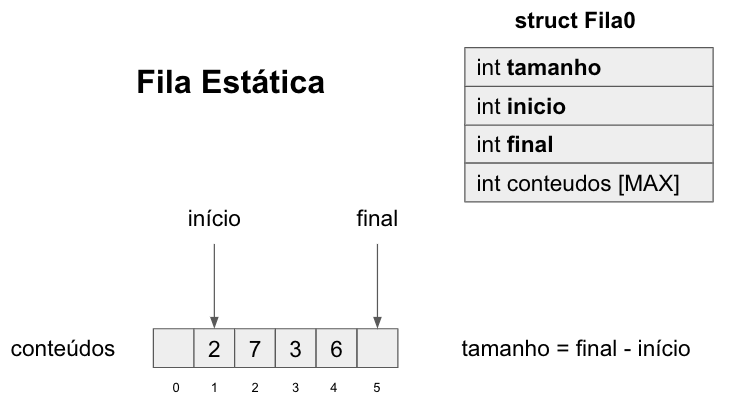

Observe que o `tamanho` da fila é facilmente calculado, não sendo essencial para a `struct`. Observe também que na Fila Estática, onde só é possível inserir no final (e remover no início), fica rapidamente cheia (vazia), mas com várias posições do vetor sem conter elementos da fila. Uma solução é manipular uma fila circular, como ilustrado na figura a seguir. Outra solução é ir dobrando o tamanho da fila com o comando `realloc` para `2*MAX`, `4*MAX`, $\cdots$.


![]("figs/cap8_5.png")

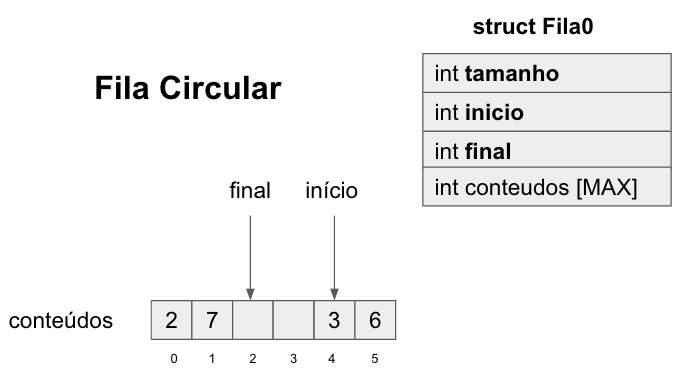

### TAD Fila Encadeada

Uma vantagem de trabalhar com **Fila Encadada**, em comparação com as filas estáticas, é que os elementos da fila são inseridos/removidos em tempo de execução. 

Com isso, a princípio não precisamos definir um tamanho da fila (número de elementos), muito menos o tamanho máximo, necessários em filas estáticas. 

Cada elemento de uma fila pode ser definido contendo um conteúdo (por exemplo, do tipo inteiro) e um ponteiro para o próximo elemento da fila, idêntico ao utilizado em listas, como segue:

```
typedef struct TCelula Celula;
struct TCelula {
  int conteudo;
  Celula* prox;
};
```

Um ponteiro `p` para uma célula pode ser definido e manipulado assim:

```
Celula *p  = (Celula*)malloc(sizeof(Celula));
*p->conteudo = 10;
*p->pro = NULL;
```

Uma fila encadeada é um conjunto de células interlicadas e pode ser acessada pelo endereço da primeira célula da fila `final`. Lembrando que se insere no final e se remone no início da fila. Assim, é necessário um outro endereço para o `inicio` da fila. Podemos encapsular esses ponteiros em uma nova `scruct`, ver figura a seguir. 



```
typedef struct TFila Fila;
struct TFila {
  Celula* inicio;
  Celula* final;
};
```

![]("figs/cap8_6.png")

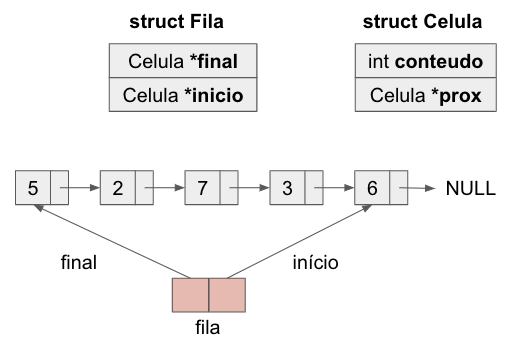

### Exemplo 04 - Criar e manipular fila encadeada

In [1]:
%%writefile myFila.h
#include <stdio.h>
#include <stdlib.h>

#define MAX 6
typedef struct TCelula Celula;
struct TCelula {
  int conteudo;
  Celula* prox;
};
typedef struct TFila Fila;
struct TFila {
  Celula* inicio;
  Celula* final;
};
//////////////////// Versão ***SEM*** PONTEIRO DE PONTEIRO
Fila* fila_cria(void);
void fila_free(Fila* fila);
void fila_imprime(Fila* fila);
void fila_insere(Fila* fila, int conteudo);
void fila_remove(Fila* fila);

In [2]:
%%writefile myFila.c
#include "myFila.h"
//////////////////// Versão 2 - ***SEM*** PONTEIRO DE PONTEIRO
Fila* fila_cria(void) {
  Fila* f = (Fila*)malloc(sizeof(Fila));
  f->inicio = f->final = NULL;
  return f;
}
void fila_insere(Fila* fila, int conteudo) {
  Celula* novo = (Celula*)malloc(sizeof(Celula));
  novo->conteudo = conteudo;
  novo->prox = fila->final;
  if (fila->inicio == NULL)
    fila->inicio = novo;
  fila->final = novo;
}
void fila_imprime(Fila* fila) {
  for (Celula* p = fila->final; p != NULL; p = p->prox)
    printf("%d ", p->conteudo);
  printf("\n");
}
void fila_free(Fila* fila) {
  if (fila == NULL) exit(1);
  Celula* aux = fila->final;
  while (aux != fila->inicio) {
    Celula* no = aux;
    aux = aux->prox;
    free(no);
  }
  free(fila);
}
void fila_remove(Fila* fila) { // remove p->prox
  Celula* ant = fila->final;
  while (ant->prox != fila->inicio)
    ant = ant->prox;
  ant->prox = NULL;
  free(fila->inicio);
  fila->inicio = ant;
}

In [3]:
%%writefile cap8ex04.c
#include "myFila.h"
int main() {
  Fila* fila = fila_cria();

  for (int i = 0; i < MAX; i++)
    fila_insere(fila, i + 1);
  fila_imprime(fila);
  fila_remove(fila);
  fila_imprime(fila);
  fila_remove(fila);
  fila_imprime(fila);
  fila_free(fila);
  return 0;
}

In [5]:
%%shell
gcc -Wall -std=c99 myFila.c cap8ex04.c -o output
./output

**DESAFIO:** Desenhar o passo-a-passo de cada método no programa anterior, como feito da figura acima.

## Tipo Abstrato de Dado (TAD) Pilha

[Ref. [Notas do prof. Paulo Feofiloff](https://www.ime.usp.br/~pf/algoritmos/aulas/pilha.html)]

Semelhante ao TAD Lista, é possível criar **TAD Pilha**, tendo que gerenciar somente o último  elemento dessa estrutura (`T=Topo` da pilha), inserindo ou removendo. Ou seja, pilhas são casos particulares de listas. No caso de **Pilha Estática**, também é necessário gerenciar o tamanho (N) da pilha.

Observe então que TAD Pilha não permite inserir/remover elementos do meio da estrutura, como ocorrem em TAD Lista.

Semelhante a uma pilha de pratos, o primeiro a entrar deverá ser o último a sair (*LIFO = Last-In-First-Out*). 

Para facilitar, é possível criar variáveis globais para gerencia esses elementos (T e N), ou também, criar uma outra estrutura de dados contendo essas informações, a gosto do desenvolvedor.

### TAD Pilha Estática

Ao manipular dados, em algumas situações (por exemplo, quando não altera muito o tamanho máximo `MAX`), é interessante se definir uma estrutura de dados estática, como segue:

```
#define MAX 6
typedef struct {
  int tamanho; // topo da pilha
  int conteudos[MAX];
} Pilha0; // AQUI pilha Estática é Pilha0 e pilha0
```

Além dessa estrutura, muitos métodos podem ser úteis para a sua manipulação. Por exemplo:

```
Pilha0* pilha0_cria(void);
void pilha0_free(Pilha0* pilha);
int pilha0_tamanho(Pilha0* pilha);
int pilha0_cheia(Pilha0* pilha);
void pilha0_imprime(Pilha0* pilha);
int pilha0_insere(Pilha0* pilha, int conteudo); // insere no topo
int pilha0_remove(Pilha0* pilha); // remove no topo
```

Esses métodos estão implementados e disponíveis no arquivo `myPilha.c`, no GitHub, juntamente com o seu uso no programa `cap8.part1ex06.c`: https://github.com/fzampirolli/codigosPE/tree/master/cap8 





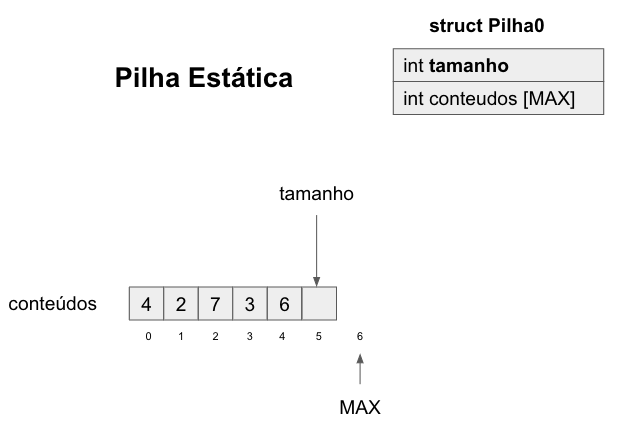

Observe que na Pilha Estática, onde só é possível inserir e remover no final, fica rapidamente cheia, mas com várias posições do vetor sem conter elementos da pilha. Uma solução é ir dobrando o tamanho da pilha com o comando `realloc` para `2*MAX`, `4*MAX`, $\cdots$.

### TAD Pilha Encadeada

Uma vantagem de trabalhar com **Pilha Encadada**, em comparação com as pilhas estáticas, é que os elementos da pilha são inseridos/removidos em tempo de execução. 

Com isso, a princípio não precisamos definir um tamanho da pilha (número de elementos), muito menos o tamanho máximo, necessários em pilhas estáticas. 

Cada elemento de uma pilha pode ser definido contendo um conteúdo (por exemplo, do tipo inteiro) e um ponteiro para o próximo elemento da pilha, idêntico ao utilizado em listas, como segue:

```
typedef struct TCelula Celula;
struct TCelula {
  int conteudo;
  Celula* prox;
};
```

Uma pilha encadeada é um conjunto de células interlicadas e pode ser acessada pelo endereço da primeira célula da `pilha` (aqui será utilizada uma célula "cabeça" apontando para to topo da pilha). Lembrando que se insere no final e se remove também no final da pilha. 


![]("figs/cap8_8.png")



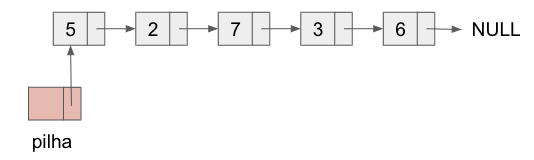

### Exemplo 04 - Criar e manipular pilha encadeada

In [1]:
%%writefile myPilha.h
#include <stdio.h>
#include <stdlib.h>

#define MAX 6
typedef struct TCelula Celula;
struct TCelula {
  int conteudo;
  Celula* prox;
};
Celula* Pilha;

//////////////////// Versão ***SEM*** PONTEIRO DE PONTEIRO
Celula* pilha_cria(void);
void pilha_free(Celula* pilha);
void pilha_imprime(Celula* pilha);
void pilha_insere(Celula* pilha, int conteudo);
void pilha_remove(Celula* pilha);

In [2]:
%%writefile myPilha.c
#include "myPilha.h"
//////////////////// Versão 2 - ***SEM*** PONTEIRO DE PONTEIRO
// ref. https://www.ime.usp.br/~pf/algoritmos/aulas/lista.html
Celula* pilha_cria(void) {
  Celula* cabeca = (Celula*)malloc(sizeof(Celula));
  if (cabeca == NULL) {
    printf("ERRO: sem memoria\n");
    exit(1);
  }
  cabeca->prox = NULL;
  return cabeca;
}
void pilha_insere(Celula* pilha, int conteudo) {
  if (pilha == NULL) exit(1);
  Celula* novo = (Celula*)malloc(sizeof(Celula));
  novo->conteudo = conteudo;
  novo->prox = pilha->prox;
  pilha->prox = novo;
}
void pilha_imprime(Celula* pilha) {
  for (Celula* p = pilha->prox; p != NULL; p = p->prox)
    printf("%d ", p->conteudo);
  printf("\n");
}
void pilha_free(Celula* pilha) {
  if (pilha == NULL) exit(1);
  Celula* aux = pilha->prox;
  while (aux != NULL) {
    Celula* no = aux;
    aux = aux->prox;
    free(no);
  }
  free(pilha);
}
void pilha_remove(Celula* pilha) { // remove p->prox
  if (pilha == NULL) exit(1);
  Celula* no;
  no = pilha->prox;
  pilha->prox = no->prox;
  free(no);
}

In [3]:
%%writefile cap8ex05.c
#include "myPilha.h"
int main() {
  Celula* pilha = pilha_cria();

  for (int i = 0; i < MAX; i++)
    pilha_insere(pilha, i + 1);
  pilha_imprime(pilha);
  pilha_remove(pilha);
  pilha_imprime(pilha);
  pilha_remove(pilha);
  pilha_imprime(pilha);
  pilha_free(pilha);
  return 0;
}

In [5]:
%%shell
gcc -Wall -std=c99 myPilha.c cap8ex05.c -o output
./output

**DESAFIO:** Desenhar o passo-a-passo de cada método no programa anterior, como feito da figura acima.

## Exercícios

Ver notebook Colab nos arquivos `cap8.partX.lab.*.ipynb` (`X` $\in$ `[2,3,4,5]` e `*` é a extensão da linguagem), utilizando alguma linguagem de programação de sua preferência, onganizadas em subpastas contidas em `"gen"`, na pasta do Google Drive [colabs](https://drive.google.com/drive/folders/1YlFwv8XYN7PYYf-HwDMlkxzbmXzJw9cM?usp=sharing).

## Revisão deste capítulo
* Introdução
* Alocação estática
* Alocação dinâmica
* Alocação dinâmica para *array* multidimensional
* Tipo Abstrato de Dados (TAD) Lista
* Tipo Abstrato de Dados (TAD) Fila
* Tipo Abstrato de Dados (TAD) Pilha
* Exercícios
* Revisão deste capítulo de Vetores